## 4.3 배열을 이용한 배열지향 프로그래밍

**벡터화** : 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법

**브로드캐스팅** : 아주 강력한 벡터 연산 방법

In [1]:
import numpy as np

In [3]:
points = np.arange(-5, 5, 0.01) # -5부터 4.99까지 0.01씩 증가하는 값들의 배열

In [7]:
# np.meshgrid  : 두 개의 1차원 배열을 받아서 가능한 모든 (x, y) 짝을 만들 수 있는 2차원 배열 두 개 반환
xs, ys = np.meshgrid(points,points)

In [5]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [6]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [8]:
z = np.sqrt(xs ** 2 + ys **2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

**2차원 배열 시각화**

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

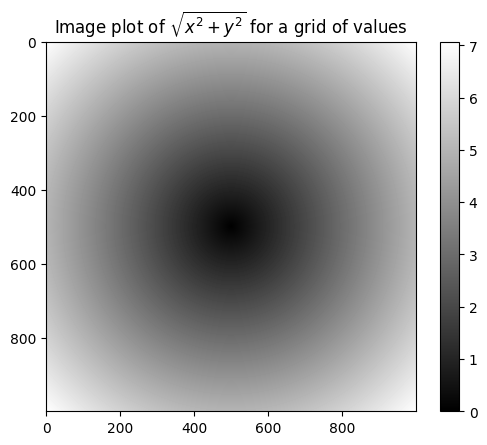

In [10]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray) ; plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 4.3.1 배열 연산으로 조건절 표현하기

**numpy.where** : x if 조건 else y 같은 삼항식의 벡터화된 버전

In [14]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [15]:
cond = np.array([True, False, True, True, False])

cond의 값이 **True**일 때는 xarr의 값을 취하고 아니면 yarr의 값을 취하기

In [16]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1, 2.2, 1.3, 1.4, 2.5]

**문제점**

* 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리 못 함
* 다차원 배열에서는 사용할 수 없음

→ **`np.where`** 함수를 사용하면 간결하게 작성 가능

In [18]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [20]:
arr = np.random.randn(4, 4)
arr

array([[-0.79834385, -0.8801864 ,  0.42333868,  1.30592863],
       [ 1.62294911, -0.34979367,  0.21092384,  1.00750493],
       [-0.34681871, -0.86879998,  0.04524692,  1.29229846],
       [ 1.40735893,  1.49964303,  0.99123047, -0.63981082]])

In [21]:
arr > 0

array([[False, False,  True,  True],
       [ True, False,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True, False]])

양수는 2로, 음수는 -2로 반환

In [22]:
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2, -2,  2,  2],
       [-2, -2,  2,  2],
       [ 2,  2,  2, -2]])

In [23]:
np.where(arr > 0, 2, arr) # 양수인 경우에만 2를 대입

array([[-0.79834385, -0.8801864 ,  2.        ,  2.        ],
       [ 2.        , -0.34979367,  2.        ,  2.        ],
       [-0.34681871, -0.86879998,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.63981082]])

np.where로 넘기는 배열은 그냥 크기만 같은 배열이거나 스칼라값이 될 수 있다.

### 4.3.2 수학 메서드와 통계 메서드

* 배열 전체 or 배열에서 한 축을 따르는 자료에 대한 통계를 계산하는 수학 함수는 배열 메서드로 사용 가능

In [25]:
arr = np.random.randn(5, 4)
arr

array([[-1.07576109,  0.27515446,  0.64465941,  0.11524364],
       [ 0.08104771, -0.77517043,  0.40877499, -0.48076092],
       [-0.01002863, -0.01214141,  0.85257655, -0.82485455],
       [-0.78018059,  0.45156239, -0.93879122, -0.3402875 ],
       [-0.44583352,  1.04679608,  2.13011702, -0.93350952]])

In [27]:
arr.mean()

-0.030569356590831202

In [28]:
np.mean(arr)

-0.030569356590831202

In [26]:
arr.sum()

-0.6113871318166241

mean이나 sum 과 같은 함수는 선택적으로 axis 인자를 받아서 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환

In [29]:
arr.mean(axis = 1)

array([-0.0101759 , -0.19152716,  0.00138799, -0.40192423,  0.44939252])

In [31]:
arr.sum(axis = 0)

array([-2.23075613,  0.98620109,  3.09733675, -2.46416884])

**arr.sum(0)** : 로우의 합

**arr.mean(1)** : 모든컬럼에서 평균

**cumsum, cumprod** : 중간 계산값을 담고 있는 배열 반환

In [33]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [34]:
arr  = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [35]:
arr.cumsum(axis = 0) # 열 누적

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [37]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

**기본 배열 통계 메서드**

**sum** : 배열 전체 or 특정 축에 대한 모든 원소의 함 계산, 크기가 0인 배열에 대한 sum 결과는 0

**mean** : 산술 평균 계산, 크기가 0인 배열에 대한 mean 결과는 NaN

**std, var** : 각각 표준편차(std)와 분산(var), 선택적으로 자유도를 줄 수 있으며 분모의 기본 값은 n이다.

**min, max** : 최솟값과 최댓값

**argmin, argmax** : 최소 원소의 색인값과 최대 원소의 색인값

**cumsum** : 각 원소의 누적값

**cumprod** : 각 원소의 누적곱


4.3.3 불리언 배열을 위한 메서드

* sum 메서드를 실행하면 불리언 배열에서 True인 원소의 개수를 셀 수 있음

In [39]:
arr = np.random.randn(100)

In [40]:
(arr > 0).sum() # 양수인 원소의 개수

47

* **any** : 하나 이상의 값이 True인지 검사

* **all** : 모든 원소가 True인지 검사

In [41]:
bools = np.array([False, False, True, False])

In [42]:
bools.any()

True

In [43]:
bools.all()

False

이들 메서드는 불리언 배열이 아니어도 동작하는데, 0이 아닌 원소는 모두 True로 간주

### 4.3.4 정렬

In [45]:
arr = np.random.randn(6)
arr

array([-0.10563127,  0.12854102,  0.02327904,  2.71107382,  0.36458491,
        1.68183784])

In [47]:
arr.sort()
arr

array([-0.10563127,  0.02327904,  0.12854102,  0.36458491,  1.68183784,
        2.71107382])

In [48]:
arr = np.random.randn(5, 3)
arr

array([[-0.8196246 ,  0.24648165, -0.53802094],
       [-0.07886884,  1.88959262, -0.38173901],
       [-0.07355362, -0.48869224, -1.03329672],
       [ 1.35731149,  0.19155848, -1.63882583],
       [-0.40204514,  0.11913461, -0.43753771]])

In [50]:
arr.sort(1) # 로우 기준 sort()
arr

array([[-0.8196246 , -0.53802094,  0.24648165],
       [-0.38173901, -0.07886884,  1.88959262],
       [-1.03329672, -0.48869224, -0.07355362],
       [-1.63882583,  0.19155848,  1.35731149],
       [-0.43753771, -0.40204514,  0.11913461]])

In [51]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [53]:
large_arr[int(0.05 * len(large_arr))] # 5% 분위수

-1.6793288594504066

### 4.3.5 집합 관련 함수

In [54]:
names = np.array(['Bob', 'Joe', 'Will','Bob', 'Will', 'Joe', 'Joe' ])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [55]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [56]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [57]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])